In [4]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [5]:
cust=pd.read_csv('Customers.csv')
cust.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
cust.shape

(200, 5)

In [7]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.1+ KB


In [8]:
cust.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

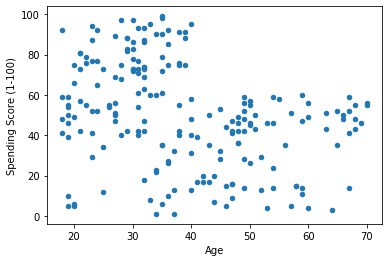

In [11]:
cust.plot.scatter(x='Age',y='Spending Score (1-100)')
plt.show()

In [12]:
X=cust[['Age','Spending Score (1-100)']].values
i=[]
for n in range(1,11):
    algorithm=KMeans(n_clusters=n)
    algorithm.fit(X)
    i.append(algorithm.inertia_) # intercluster varience increase will if they mismatch

In [13]:
i

[171535.5,
 75949.15601023017,
 45840.67661610867,
 28165.58356662934,
 23810.462233071365,
 19566.522341377604,
 15523.684014328752,
 13055.626865965576,
 11459.506094710443,
 10166.941120031213]

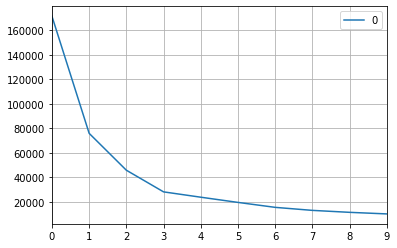

In [17]:
pd.DataFrame(i).plot()
plt.grid(True)

In [18]:
algorithm=KMeans(n_clusters=5)
algorithm.fit(X)
labels=algorithm.labels_

In [19]:
c=cust[['Age','Spending Score (1-100)']]
c

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [21]:
labeledc=c.assign(cluster=labels)
labeledc

,Age,Spending Score (1-100),cluster
0,19,39,4
1,21,81,2
2,20,6,0
3,23,77,2
4,31,40,3
...,...,...,...
195,35,79,2
196,45,28,3
197,32,74,2
198,32,18,0


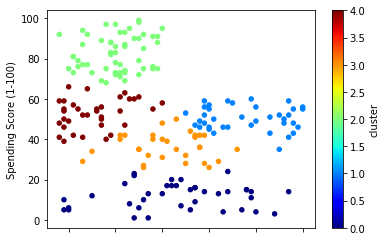

In [31]:
labeledc.plot.scatter(x='Age',y='Spending Score (1-100)',c='cluster',cmap='jet')